#### Descriptive Analytics for Numerical Columns


Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sales_data_with_discounts.csv') #Loading the dataset into dataframe using pandas

In [3]:
df.shape #used to check shape i.e 450rows x 13 columns

(450, 13)

In [4]:
df.head() #used to provide first 5 rows of the dataset

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
df.info() #provides detailed summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [40]:
numerical_columns = df.select_dtypes(include=['int','float'])  #select only the numerical columns from a Pandas DataFrame.

In [41]:
numerical_columns

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [42]:
numerical_mode = numerical_columns.mode().iloc[0] # calculates the mode for all numerical columns in a DataFrame and stores the result.

In [ ]:
numerical_mode 

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [44]:

stats = numerical_columns.agg(['mean','median','std']) #using agg() we calculates multiple key descriptive statistics for all numerical columns in a DataFrame.

In [45]:
stats

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624


Interpretation:

1) Volume: On average, ~5 units are sold per record, but with a relatively high spread (Std Dev ≈ 4.23), indicating variability in order sizes.

2) Avg Price: The mean is much higher than the median, suggesting some very high-priced items are skewing the average.

3) Total Sales Value: High standard deviation and mean >> median imply sales values vary widely, possibly due to differing product prices or volumes.

4) Discount Rate (%): Fairly consistent discounts (mean ≈ 15%, std ≈ 4%), showing moderate variability.

5) Discount Amount: Large variation—some transactions have small discounts, while others have very large ones.

6) Net Sales Value: Highly dispersed, reflecting variability in both price and volume after discounts

#### Data Visualization

Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

##### Histograms:

Plot histograms for each numerical column.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

Text(0.5, 0.98, 'Histograms of Numerical Columns')

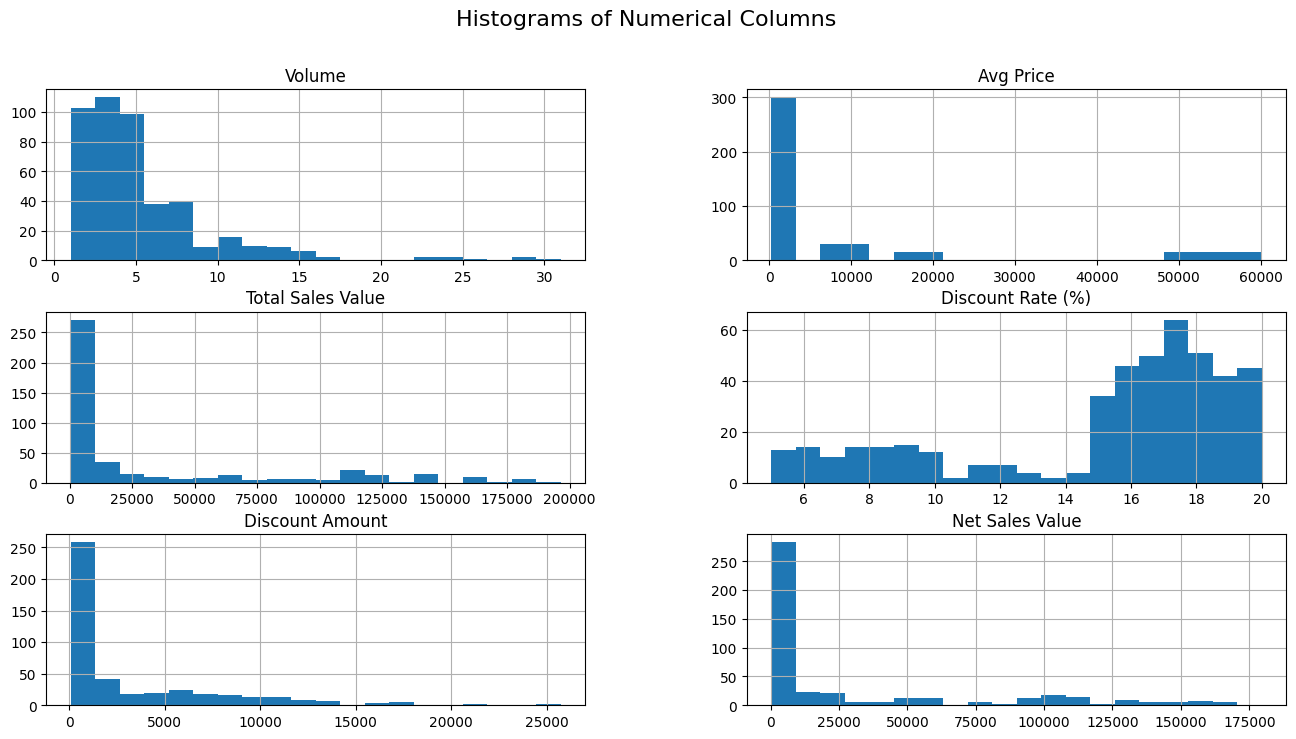

In [59]:
numerical_columns.hist(figsize=(16, 8), bins=20)
plt.suptitle('Histograms of Numerical Columns', fontsize=16)

In [60]:
skewness = numerical_columns.skew()
print("\nSkewness of Numerical Columns:")
print(skewness)


Skewness of Numerical Columns:
Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


##### By analysing the columns
Volume (2.73) → Highly right-skewed → mostly low volumes, few very high.

Avg Price (1.91) → Right-skewed → most products are cheap, few expensive.

Total Sales Value (1.53) → Right-skewed → many small sales, few very large.

Discount Rate (%) (-1.06) → Left-skewed → most discounts are high, few low.

Discount Amount (1.91) → Right-skewed → small discounts common, large discounts rare.

Net Sales Value (1.54) → Right-skewed → many small sales, few very high sales.

#### BoxPlot

Create boxplots for numerical variables to identify outliers and the interquartile range.

Discuss any findings, such as extreme values or unusual distributions.

<Axes: >

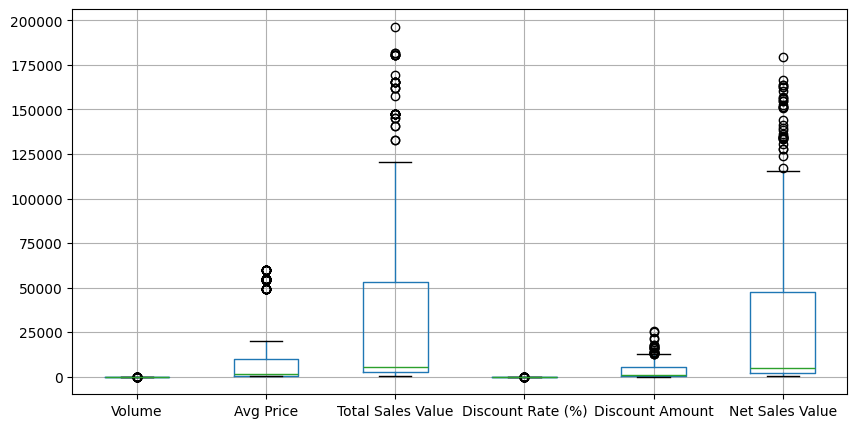

In [35]:
df[numerical_columns].boxplot(figsize=(10,5))

1) Most variables show right-skewed distributions.

2) Total Sales Value, Discount Amount, and Net Sales Value have many extreme outliers.

3) Avg Price and Volume have a few high outliers.

4) Discount Rate (%) stays mostly low with minimal variation.

5) The IQR is large for sales-related columns.

#### Bar Chart Analysis for Categorical Column:

Identify categorical columns in the dataset.

Create bar charts to visualize the frequency or count of each category.

Analyze the distribution of categories and provide insights

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [52]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


C:\Users\Dell\AppData\Local\Temp\ipykernel_27920\1513616933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


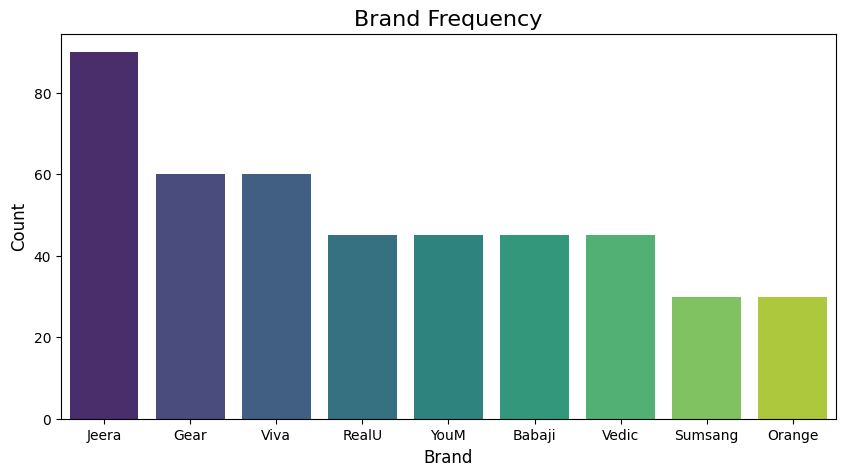

In [58]:
brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Brand Frequency', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Most Frequent Brand: Jeera is the most frequent brand by a significant margin, with a count of approximately 90.

Second Tier: Gear and Viva are the next most common brands, both having a count of 60.

Mid-Tier Brands: RealU, YouM, Babaji, and Vedic form a middle group, all with a similar frequency of about 45.

Least Frequent Brands: Sumsang and Orange are the least frequent brands in this list, each with a count of 30

#### Conclusion

1) Skewed Sales Data: Sales figures are heavily right-skewed, with a few high-value transactions and outliers significantly increasing the average values.

2) Variable Discounts: While the percentage-based discount rates are consistent, the actual monetary discount amounts vary widely due to the large range in sales prices.

3) Brand Dominance: "Jeera" is the most frequent brand by a large margin, followed by "Gear" and "Viva" as the next most popular.